# (28) Eval

**Motivation**: Load models, evaluate. Also, load trainer object and continue training from a checkpoint. <br>

In [1]:
# HIDE CODE


import os, sys
from copy import deepcopy as dc
from os.path import join as pjoin
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-MTMST/_extras')
fig_base_dir = pjoin(git_dir, 'jb-MTMST/figs')
tmp_dir = pjoin(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_MTMST'))
from figures.fighelper import *
from model.opticflow import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
from rich.jupyter import print
%matplotlib inline
set_style()

## Load model

In [2]:
%%time

model_name = 'k-64_z-5x[4,2,1]_post-1x3_cmprs'
fit_name = 'epochs1k_(2023_03_07,20:05)'
tr, metadata = load_model(
    model_name=model_name,
    fit_name=fit_name,
    verbose=True,
    device='cuda',
)

FileNotFoundError: [Errno 2] No such file or directory: '/home/hadi/Documents/MTMST/models/k-64_z-5x[4,2,1]_post-1x3_cmprs'

In [3]:
%%time

val, loss = tr.validate(n_samples=None)
loss

CPU times: user 59.8 s, sys: 2.43 s, total: 1min 2s
Wall time: 5.91 s


{'kl': 115.25149790445964,
 'recon': 0.9604130277193215,
 'recon_balanced': 0.5586518777182782}

In [4]:
list(val)

['x', 'y', 'z']

In [5]:
%%time

val, loss = tr.validate()
{k: v.mean() for k, v in loss.items()}

CPU times: user 14min 31s, sys: 26.3 s, total: 14min 57s
Wall time: 1min 21s


{'kl': 115.25381571451823,
 'recon': 0.9606351737037719,
 'recon_balanced': 0.5595423619191809}

In [6]:
list(val)

['x_sample',
 'z_sample',
 'z_vld',
 'z_tst',
 'g_vld',
 'g_tst',
 'regr/mi',
 'regr/r',
 'regr/lr',
 'fig/sample',
 'fig/corr_z',
 'fig/regression',
 'fig/mutual_info',
 'fig/hist_z',
 'fig/hist_x_sample']

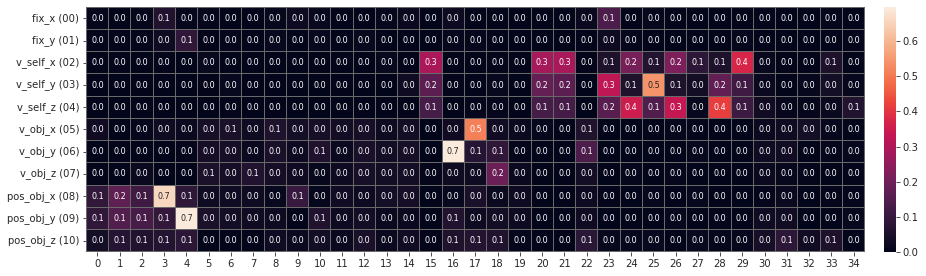

In [8]:
val['fig/mutual_info']

In [11]:
tr.model.cfg.runs_dir

'/home/hadi/Documents/MTMST/runs/k-64_z-5x[4,2,1]_post-1x3_cmprs'

In [6]:
from model.common import Conv2D

tensor([0.5940, 0.5856, 0.6076, 0.5986, 0.5893, 0.6099, 0.5940, 0.5858, 0.5875,
        0.5775, 0.5832, 0.5822, 0.5797, 0.5864, 0.5858, 0.6004, 0.6072, 0.5707,
        0.5915, 0.5923, 0.5861, 0.6077, 0.5798, 0.5879, 0.6012, 0.5910, 0.5919,
        0.6015, 0.5927, 0.5981, 0.5836, 0.5951, 0.5827, 0.5706, 0.5874, 0.5874,
        0.5829, 0.6011, 0.5698, 0.5940, 0.5865, 0.5930, 0.5600, 0.5925, 0.5804,
        0.5930, 0.5767, 0.5899, 0.5911, 0.5815, 0.5785, 0.5938, 0.5922, 0.5950,
        0.5909, 0.5838, 0.5833, 0.5752, 0.6042, 0.6058, 0.5952, 0.5811, 0.5962,
        0.5815, 0.6011, 0.5809, 0.5856, 0.5669, 0.5797, 0.5828, 0.5758, 0.5752,
        0.5820, 0.5703, 0.5846, 0.5979, 0.5752, 0.5973, 0.5877, 0.5937, 0.6009,
        0.5834, 0.5853, 0.5880, 0.5731, 0.6026, 0.5766, 0.5757, 0.6147, 0.5851,
        0.5802, 0.6078, 0.5909, 0.5865, 0.5732, 0.5716, 0.6056, 0.5747, 0.5872,
        0.5908, 0.5924, 0.5857, 0.5700, 0.6031, 0.5866, 0.5990, 0.5955, 0.5783,
        0.6002, 0.5843, 0.5886, 0.6054, 

In [14]:
n = np.arange(1, 101)
scale = -0.5 * np.log(n)
scale

array([-0.        , -0.34657359, -0.54930614, -0.69314718, -0.80471896,
       -0.89587973, -0.97295507, -1.03972077, -1.09861229, -1.15129255,
       -1.19894764, -1.24245332, -1.28247468, -1.31952866, -1.3540251 ,
       -1.38629436, -1.41660667, -1.44518588, -1.47221949, -1.49786614,
       -1.52226122, -1.54552123, -1.56774711, -1.58902692, -1.60943791,
       -1.62904827, -1.64791843, -1.66610226, -1.68364791, -1.70059869,
       -1.7169936 , -1.73286795, -1.74825378, -1.76318026, -1.77767403,
       -1.79175947, -1.80545896, -1.81879308, -1.83178082, -1.84443973,
       -1.85678603, -1.86883481, -1.88060006, -1.89209482, -1.90333124,
       -1.9143207 , -1.9250738 , -1.93560051, -1.94591015, -1.9560115 ,
       -1.96591282, -1.97562186, -1.98514596, -1.99449202, -2.00366659,
       -2.01267585, -2.02152563, -2.03022151, -2.03876872, -2.04717228,
       -2.05543693, -2.06356719, -2.07156736, -2.07944154, -2.08719363,
       -2.09482737, -2.10234631, -2.10975385, -2.11705325, -2.12

In [26]:
def _dims(normalize_dim, ndims):
	assert normalize_dim in [0, 1]
	dims = list(range(ndims))
	shape = [
		1 if i != normalize_dim
		else -1 for i in dims
	]
	dims.pop(normalize_dim)
	return dims, shape


def _normalize(lognorm, weight, shape, dims, eps=1e-12):
	n = torch.exp(lognorm).view(shape)
	wn = torch.linalg.vector_norm(
		x=weight, dim=dims, keepdim=True)
	return n * weight / (wn + eps)


class Conv2D(nn.Conv2d):
    def __init__(
            self,
            in_channels: int,
            out_channels: int,
            kernel_size: Union[int, Tuple[int, int]],
            normalize_dim: int = 0,
            depth: int = None,  # TODO
            **kwargs,
    ):
        kwargs = filter_kwargs(nn.Conv2d, kwargs)
        super(Conv2D, self).__init__(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=kernel_size,
            **kwargs,
        )
        self.dims, self.shape = _dims(normalize_dim, 4)
        init = torch.linalg.vector_norm(
            x=self.weight, dim=self.dims)
        print(init)
        # TODO: new start
        # init += 1 - torch.mean(init)
        if depth is not None:
            assert depth > 0
            init /= np.sqrt(depth)
        self.log_weight_norm = nn.Parameter(
            torch.log(init), requires_grad=True)
        # TODO: new end
        self.w = self.normalize_weight()

    def forward(self, x):
        self.w = self.normalize_weight()
        return F.conv2d(
            input=x,
            weight=self.w,
            bias=self.bias,
            stride=self.stride,
            padding=self.padding,
            dilation=self.dilation,
            groups=self.groups,
        )

    def normalize_weight(self):
        return _normalize(
            lognorm=self.log_weight_norm,
            weight=self.weight,
            shape=self.shape,
            dims=self.dims,
        )

In [28]:
from model.common import Conv2D

In [29]:
norms = np.zeros((100, 128))
for n in range(1, 101):
    c = Conv2D(64, 128, 3, 0, depth=n)
    norms[n-1] = to_np(c.log_weight_norm.exp())

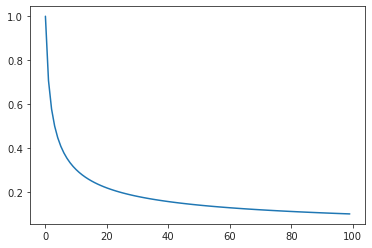

In [31]:
plt.plot(norms.mean(1))

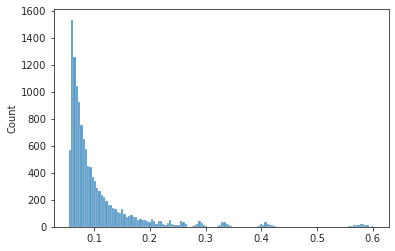

In [25]:
ax = sns.histplot(norms.ravel())

In [32]:
import tensorflow as tf

In [46]:
def log_sum_exp(x):
    """ numerically stable log_sum_exp implementation that prevents overflow """
    axis = len(x.get_shape()) - 1
    m = tf.reduce_max(x, axis)
    m2 = tf.reduce_max(x, axis, keepdims=True)
    return m + tf.math.log(tf.reduce_sum(tf.exp(x-m2), axis))

In [47]:
x = tf.random.normal((20, 50))
x.shape

TensorShape([20, 50])

In [50]:
axis = len(x.get_shape()) - 1
axis

1

In [48]:
log_sum_exp(x)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([3.9516807, 4.5502844, 4.6999106, 4.2701683, 4.7697687, 4.333488 ,
       4.6091847, 4.465862 , 4.2570095, 4.4932694, 4.3594756, 4.456479 ,
       4.3079667, 4.2077503, 4.259165 , 4.208122 , 4.2458577, 4.2792616,
       3.8346508, 4.4091496], dtype=float32)>

In [54]:
tf.reduce_sum(tf.exp(x), 1)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([ 52.022728,  94.65933 , 109.937355,  71.533646, 117.89195 ,
        76.20963 , 100.40227 ,  86.99597 ,  70.59855 ,  89.4133  ,
        78.2161  ,  86.183525,  74.2893  ,  67.205185,  70.75088 ,
        67.23014 ,  69.81561 ,  72.18714 ,  46.277267,  82.199524],
      dtype=float32)>

In [2]:
from model.vae2d import VAE
from model.train import TrainerVAE

In [4]:
vae = VAE(ConfigVAE(
    n_kers=4,
    n_latent_scales=3, n_groups_per_scale=20, n_latent_per_group=3,
    n_pre_blocks=0, n_post_cells=3, n_cells_per_cond=2,
    spectral_norm=0, # n_power_iter=1,
    ada_groups=True,
))
tr =self= TrainerVAE(
    model=torch.compile(vae),
    cfg=ConfigTrain(
        lr=0.001, batch_size=512, epochs=1000, grad_clip=300,
        lambda_anneal=True),
    device='cpu',
)
vae.cfg.total_latents()

105

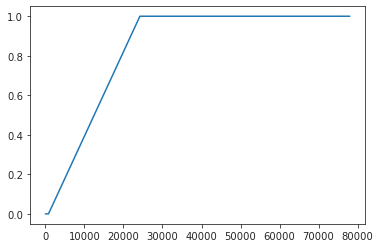

In [5]:
plt.plot(tr.betas)

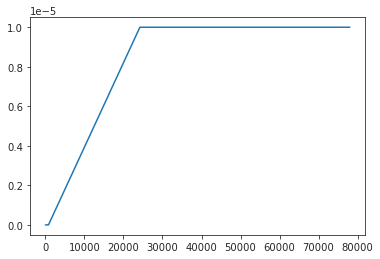

In [6]:
plt.plot(tr.wd_coeffs)

In [7]:
min(tr.wd_coeffs), max(tr.wd_coeffs)

(1e-15, 1e-05)

In [8]:
print(vae)

VAE(
  (stem): Conv2D(2, 32, kernel_size=(4, 4), stride=(1, 1), padding=valid)
  (pre): ModuleList()
  (enc_tower): ModuleList(
    (0-1): 2 x Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=32, out_features=4, bias=True)
          (1): SiLU()
          (2): Linear(in_features=4, out_features=32, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (2): CombinerEnc(
      (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
    )
    (3-4): 2 x Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=32, out_features=4, bias=True)
          (1): SiLU()
          (2): Linear(in_features=4, out_features=32, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (5): CombinerEnc(
      (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
    )
    (6-7): 2 x Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=32, out_features=4, bias=True)
          (1): SiLU()
          (2): Linear(in_features=4, out_features=32, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (8): CombinerEnc(
      (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
    )
    (9-10): 2 x Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=32, out_features=4, bias=True)
          (1): SiLU()
          (2): Linear(in_features=4, out_features=32, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (11): CombinerEnc(
      (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
    )
    (12-13): 2 x Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=32, out_features=4, bias=True)
          (1): SiLU()
          (2): Linear(in_features=4, out_features=32, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (14): CombinerEnc(
      (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
    )
    (15-16): 2 x Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=32, out_features=4, bias=True)
          (1): SiLU()
          (2): Linear(in_features=4, out_features=32, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (17): CombinerEnc(
      (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
    )
    (18-19): 2 x Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Co

In [24]:
tr.cfg.optimizer_kws

{'betas': (0.9, 0.999), 'weight_decay': 0.0003, 'eps': 1e-08}

In [11]:
from model.common import Cell

In [23]:
ctr = 0
for cell in vae.enc_tower:
    if isinstance(cell, Cell):
        for op in cell.ops:
            if op.conv.init_scale is not None:
                it = np.round(1/op.conv.init_scale**2)
            else:
                it = None
            print(ctr, op.conv.init_scale, it)
            ctr += 1

0 None None

1 1.0 1.0

2 None None

3 0.7071067811865475 2.0

4 None None

5 0.5773502691896258 3.0

6 None None

7 0.5 4.0

8 None None

9 0.4472135954999579 5.0

10 None None

11 0.4082482904638631 6.0

12 None None

13 0.3779644730092272 7.0

14 None None

15 0.35355339059327373 8.0

16 None None

17 0.3333333333333333 9.0

18 None None

19 0.31622776601683794 10.0

20 None None

21 0.30151134457776363 11.0

22 None None

23 0.2886751345948129 12.0

24 None None

25 0.2773500981126146 13.0

26 None None

27 0.2672612419124244 14.0

28 None None

29 0.2581988897471611 15.0

30 None None

31 0.25 16.0

32 None None

33 0.24253562503633297 17.0

34 None None

35 0.23570226039551587 18.0

36 None None

37 0.22941573387056174 19.0

38 None None

39 0.22360679774997896 20.0

40 None None

41 0.2182178902359924 21.0

42 None None

43 0.21320071635561041 22.0

44 None None

45 0.20851441405707477 23.0

46 None None

47 0.20412414523193154 24.0

48 None None

49 0.2 25.0

50 None None

51 0.19611613513818404 26.0

52 None None

53 0.19245008972987526 27.0

54 None None

55 0.1889822365046136 28.0

56 None None

57 0.18569533817705186 29.0

58 None None

59 0.18257418583505536 30.0

60 None None

61 0.1796053020267749 31.0

62 None None

63 0.17677669529663687 32.0

64 None None

65 0.17407765595569785 33.0

66 None None

67 0.17149858514250882 34.0

68 None None

69 0.1690308509457033 35.0

70 None None

71 0.16666666666666666 36.0

72 None None

73 0.1643989873053573 37.0

74 None None

75 0.16222142113076254 38.0

76 None None

77 0.16012815380508713 39.0

78 None None

79 0.15811388300841897 40.0

80 None None

81 0.15617376188860607 41.0

82 None None

83 0.1543033499620919 42.0

84 None None

85 0.15249857033260467 43.0

86 None None

87 0.15075567228888181 44.0

88 None None

89 0.14907119849998599 45.0

90 None None

91 0.14744195615489714 46.0

92 None None

93 0.14586499149789456 47.0

94 None None

95 0.14433756729740646 48.0

96 None None

97 0.14285714285714285 49.0

98 None None

99 0.1414213562373095 50.0

100 None None

101 0.14002800840280097 51.0

102 None None

103 0.1386750490563073 52.0

104 None None

105 0.13736056394868904 53.0

106 None None

107 0.13608276348795434 54.0

108 None None

109 0.13483997249264842 55.0

110 None None

111 0.1336306209562122 56.0

112 None None

113 0.13245323570650439 57.0

114 None None

115 0.13130643285972254 58.0

116 None None

117 0.13018891098082389 59.0

118 None None

119 0.12909944487358055 60.0

120 None None

121 0.12803687993289598 61.0

122 None None

123 0.1270001270001905 62.0

124 None None

125 0.1259881576697424 63.0

126 None None

127 0.125 64.0

128 None None

129 0.12403473458920847 65.0

130 None None

131 0.12309149097933272 66.0

132 None None

133 0.12216944435630522 67.0

134 None None

135 0.12126781251816648 68.0

136 None None

137 0.1203858530857692 69.0

138 None None

139 0.11952286093343936 70.0

140 None None

141 0.11867816581938533 71.0

142 None None

143 0.11785113019775793 72.0

In [19]:
ctr = 0
for cell in vae.dec_tower:
    if isinstance(cell, Cell):
        for op in cell.ops:
            print(ctr, 1/op.conv.init_scale**2)
            ctr += 1

0 1.0

1 2.0000000000000004

2 2.999999999999999

3 4.0

4 5.0

5 5.999999999999998

6 7.000000000000002

7 8.000000000000002

8 9.0

9 10.0

10 11.0

11 11.999999999999996

12 13.0

13 13.999999999999998

14 15.000000000000004

15 16.0

16 17.0

17 17.999999999999996

18 19.000000000000004

19 20.0

20 20.999999999999996

21 22.000000000000004

22 22.999999999999996

23 23.999999999999993

24 24.999999999999996

25 26.0

26 26.999999999999996

27 28.000000000000007

28 29.0

29 30.000000000000007

30 30.999999999999993

31 32.00000000000001

32 32.99999999999999

33 34.00000000000001

34 35.00000000000001

35 36.0

36 37.0

37 38.0

38 39.0

39 40.0

40 41.0

41 41.99999999999999

42 43.0

43 44.0

44 45.0

45 46.0

46 47.0

47 47.999999999999986

48 49.00000000000001

49 50.0

50 51.00000000000001

51 52.0

52 52.99999999999999

53 54.0

54 54.99999999999999

55 55.99999999999999

56 56.99999999999999

57 58.000000000000014

58 58.999999999999986

59 60.000000000000014

60 61.0

61 62.0

62 63.000000000000014

63 64.0

64 64.99999999999999

65 66.0

66 67.0

67 68.0

68 69.0

69 70.0

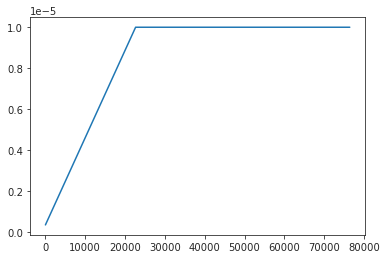

In [31]:
plt.plot(tr.wd_coeffs[int(0.02*len(tr.wd_coeffs)):])

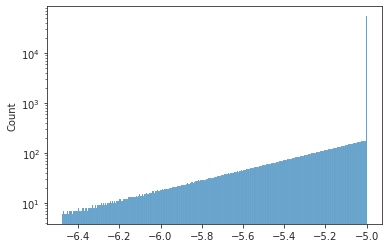

In [32]:
ax = sns.histplot(np.log10(tr.wd_coeffs)[int(0.02*len(tr.wd_coeffs)):])
ax.set_yscale('log')

In [36]:
fix = np.array([[1, 2, 3], [5, 2, 1]])

In [38]:
sf = skew(fix, 1)
sf

array([[[ 0, -3,  2],
        [ 3,  0, -1],
        [-2,  1,  0]],

       [[ 0, -1,  2],
        [ 1,  0, -5],
        [-2,  5,  0]]])

In [39]:
sf[0]

array([[ 0, -3,  2],
       [ 3,  0, -1],
       [-2,  1,  0]])

125000

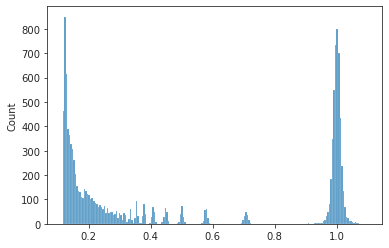

In [9]:
all_norm = torch.cat(vae.all_log_norm)
all_norm = torch.exp(all_norm)
sns.histplot(to_np(all_norm), bins=200);

In [7]:
vae.cfg.name()

'k-32_z-3x[5,10,20]_cells-2_post-1x3'

In [10]:
cfg = ConfigVAE(
    n_kers=4,
    n_latent_scales=3, n_groups_per_scale=20, n_latent_per_group=3,
    n_pre_blocks=0, n_post_cells=3, n_cells_per_cond=2,
    spectral_norm=5, # n_power_iter=1,
    ada_groups=True,
)

In [11]:
cfg.name()

'k-32_z-3x[5,10,20]_cells-2_post-1x3_sn-5'

In [12]:
vae

VAE(
  (stem): Conv2D(2, 32, kernel_size=(4, 4), stride=(1, 1), padding=valid)
  (pre): ModuleList()
  (enc_tower): ModuleList(
    (0-1): 2 x Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=32, out_features=4, bias=True)
          (1): SiLU()
          (2): Linear(in_features=4, out_features=32, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (2): CombinerEnc(
      (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
    )
    (3-4): 2 x Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
  

In [16]:
depth = 2

In [17]:
np.power(depth, -0.5)

0.7071067811865476

In [18]:
init_scale=1 / np.sqrt(depth),

0.7071067811865475

In [6]:
coeffs = []
for gstep in range(len(self.betas)):
    if self.cfg.lambda_anneal:
        wd_coeff = self.betas[gstep] / self.cfg.kl_beta * self.cfg.lambda_norm
    else:
        wd_coeff = self.cfg.lambda_norm
    coeffs.append(wd_coeff)

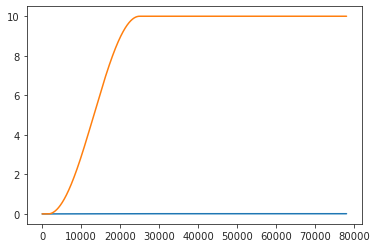

In [7]:
plt.plot(coeffs)
plt.plot(tr.betas)

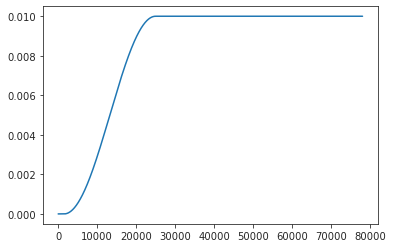

In [8]:
plt.plot(coeffs)

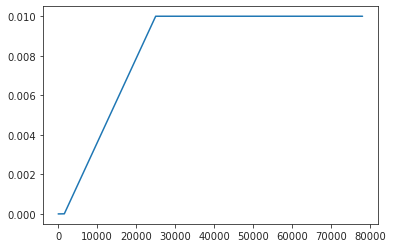

In [26]:
plt.plot(wd_coeffs)

In [28]:
wd_coeffs

array([1.e-09, 1.e-09, 1.e-09, ..., 1.e-02, 1.e-02, 1.e-02])

In [ ]:
t = self.n_iters * self.cfg.kl_anneal_portion
delta = self.cfg.lambda_norm - self.cfg.lambda_init
wd_coeff = (gstep-1) * delta / (t-1)
wd_coeff += self.cfg.lambda_init

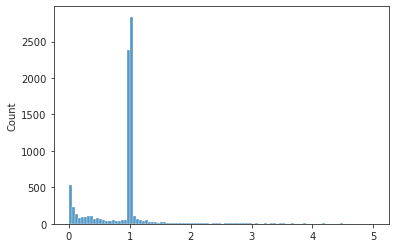

In [4]:
all_norm = [torch.exp(n.ravel()) for n in tr.model.all_log_norm]
all_norm = to_np(torch.cat(all_norm))
sns.histplot(all_norm, bins=np.linspace(0, 5, 101));

In [5]:
np.max(all_norm), (all_norm > 5).sum() / len(all_norm)

(365.48495, 0.048861875819330235)

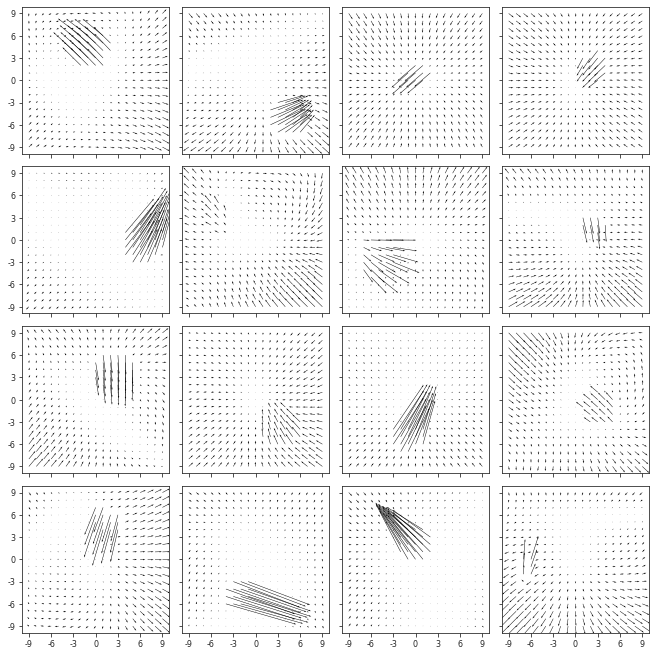

In [6]:
_ = show_opticflow(val['y'])

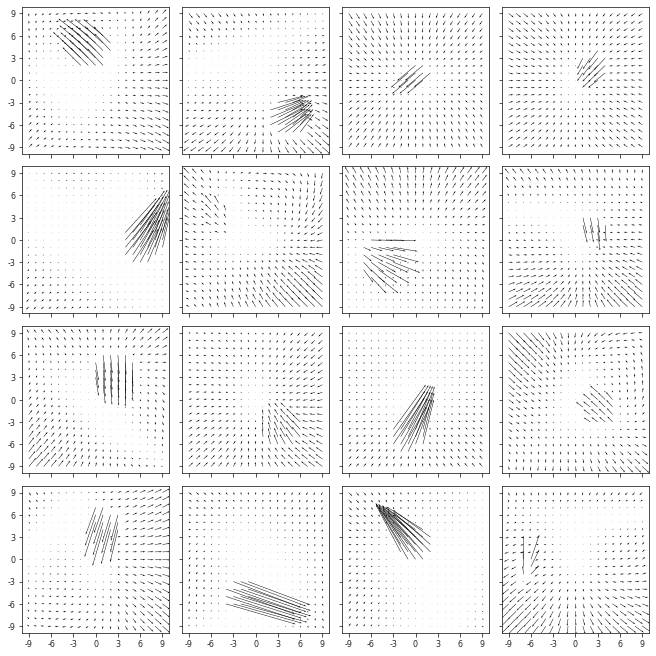

In [7]:
_ = show_opticflow(val['x'])

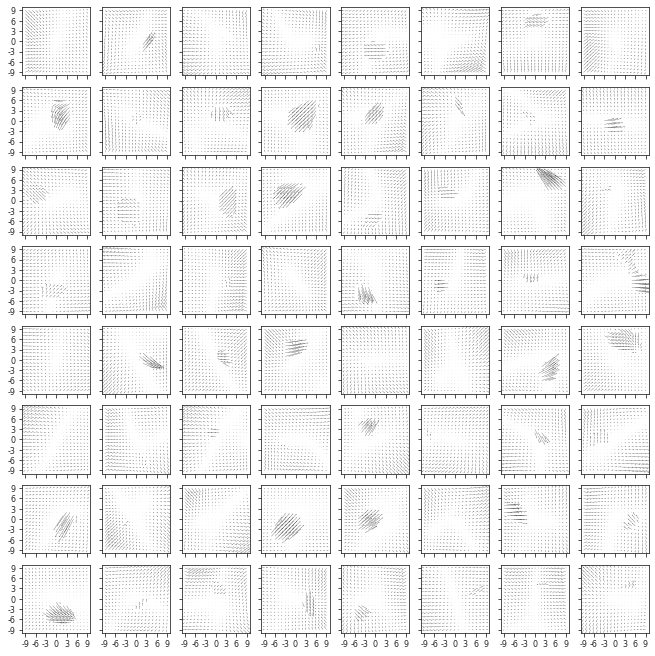

In [10]:
_ = show_opticflow(val['x_sample'], num=8)

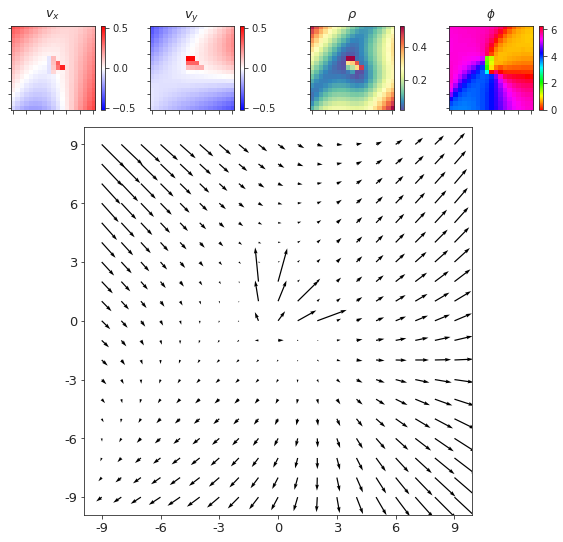

In [11]:
_ = show_opticflow_full(val['x_sample'][1200])

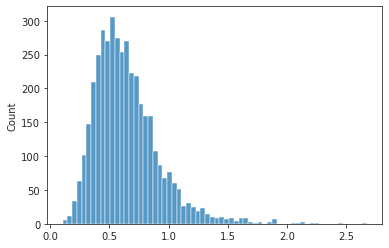

In [12]:
norm = sp_lin.norm(val['x_sample'], axis=-1).mean(-1).mean(-1)
sns.histplot(norm);

In [13]:
len(tr.model.all_conv_layers), len(tr.model.all_log_norm)

(94, 94)

In [14]:
collections.Counter([e.size()[0] for e in tr.model.all_log_norm]).most_common()

[(64, 47), (128, 24), (32, 8), (256, 8), (1, 7)]

In [15]:
(tr.model.stem.log_weight_norm.exp())

tensor([ 0.9789,  2.7167,  0.7256,  7.4357,  1.4072,  1.4588,  0.9594, 14.5877,
         1.2422,  0.5339,  1.5797, 14.3785,  4.0647,  0.9762, 34.6146,  3.9555,
         0.9999, 37.1359, 34.9906,  1.5097,  1.0043, 17.5705, 21.6482,  0.8464,
         1.3023,  0.9795,  8.0115,  1.8339,  0.9037,  0.9655,  6.3268,  0.9148,
         0.9804,  1.2705, 10.8379,  0.6256,  0.5118,  3.7135,  0.7316,  0.6354,
         0.8238,  2.6631,  0.9869,  0.6566,  0.3651,  0.9195,  5.2355,  1.3570,
        12.7894,  0.9888,  2.0936, 17.9111, 16.5327,  2.4881,  0.3487, 19.5272,
         1.7113,  9.2585,  9.6030,  1.0000, 14.7531,  0.7951,  1.0000,  0.5631],
       device='cuda:0', grad_fn=<ExpBackward0>)

In [14]:
to_np(torch.linalg.vector_norm(tr.model.stem.weight, dim=[1, 2, 3]))

array([0.12810904, 0.21889564, 0.21213646, 0.23898908, 0.26464158,
       0.22333531, 0.14764893, 0.22803165, 0.19473101, 0.14975601,
       0.28858453, 0.28247535, 0.234966  , 0.14203611, 0.25449663,
       0.2774155 , 0.14323731, 0.24444684, 0.21794473, 0.21319197,
       0.14051361, 0.31486693, 0.22484505, 0.09385117, 0.19239986,
       0.15647613, 0.1816894 , 0.27404597, 0.16939262, 0.3176312 ,
       0.24297562, 0.13734569, 0.20481722, 0.27996248, 0.36396262,
       0.10510738, 0.21351688, 0.35216305, 0.12966399, 0.12744176,
       0.13831973, 0.18600093, 0.12826237, 0.11905325, 0.19547994,
       0.15562478, 0.27106288, 0.20461586, 0.6398145 , 0.17176522,
       0.26067924, 0.21045041, 0.1722161 , 0.23007245, 0.1166497 ,
       0.25988105, 0.24044141, 0.24709582, 0.36232522, 0.1462865 ,
       0.25419515, 0.17688769, 0.13448782, 0.15440232], dtype=float32)

In [15]:
w = to_np(tr.model.stem.weight)
w.shape

(64, 2, 4, 4)

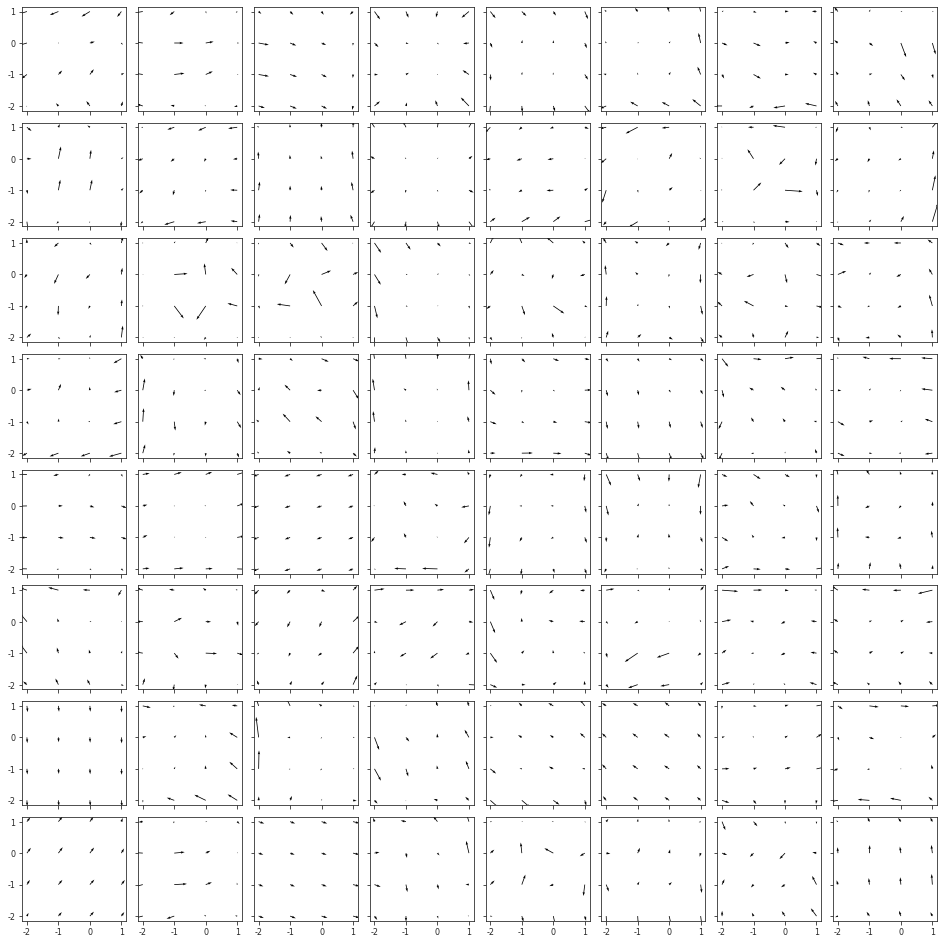

In [16]:
_ = show_opticflow(w, 8, figsize=(13,) * 2, tick_spacing=1)

In [16]:
scales = tr.model.latent_scales()

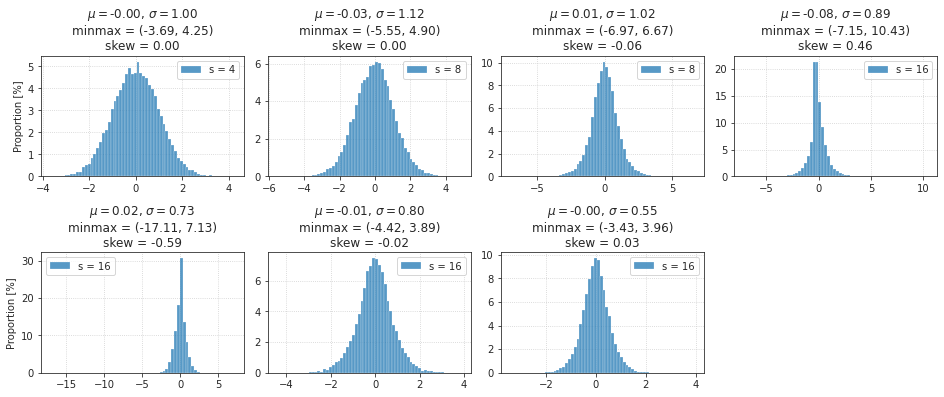

In [17]:
plot_latents_hist(val['z_sample'], scales);

In [18]:
np.min(val['z_sample']), np.max(val['z_sample'])

(-17.105827, 10.43206)

In [19]:
i, zz = np.unravel_index(np.argmin(val['z_sample']), val['z_sample'].shape)
i, zz

(2264, 22)

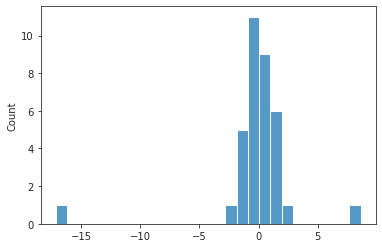

In [20]:
sns.histplot(val['z_sample'][i]);

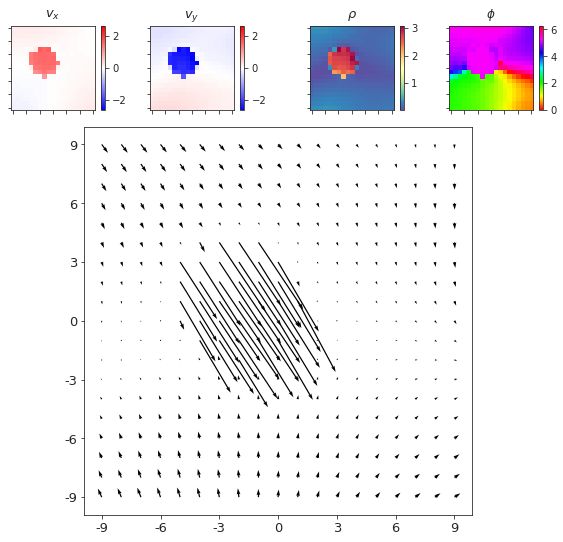

In [21]:
show_opticflow_full(val['x_sample'][i]);

In [22]:
i, zz = np.unravel_index(np.argmax(val['z_sample']), val['z_sample'].shape)
i, zz

(1091, 17)

In [23]:
sns.histplot(val['z_sample'][i]);

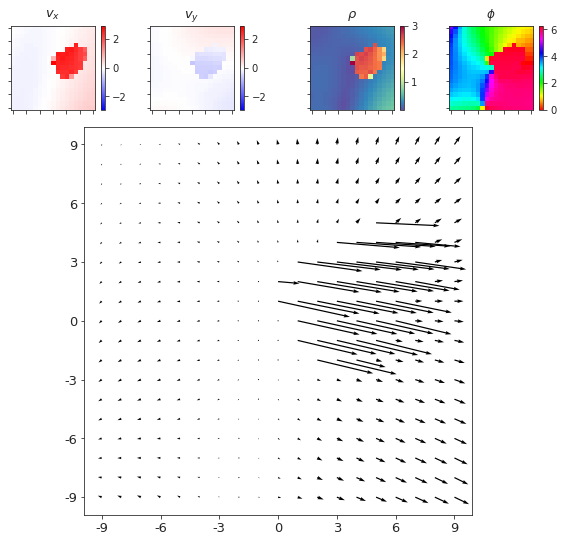

In [24]:
show_opticflow_full(val['x_sample'][i]);

In [26]:
torch.abs(torch.cat(tr.model.all_log_norm)).sum()

tensor(5908.3848, device='cuda:0', grad_fn=<SumBackward0>)

In [27]:
tot = sum([len(e) for e in tr.model.all_log_norm])

In [28]:
tot

8391

In [30]:
a = to_np(torch.abs(torch.cat(tr.model.all_log_norm)))

<AxesSubplot:ylabel='Count'>

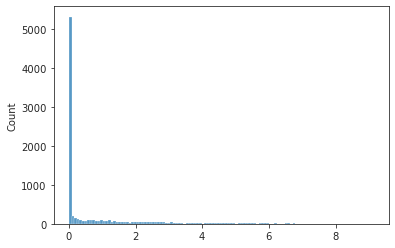

In [32]:
sns.histplot(a)

In [33]:
all_norms = to_np(torch.cat(tr.model.all_log_norm).exp())

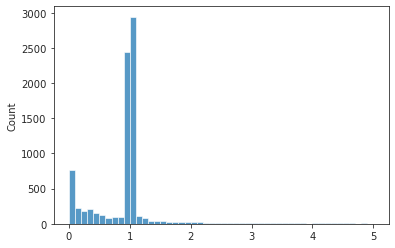

In [34]:
ax = sns.histplot(all_norms, bins=np.linspace(0, 5, 51));

In [35]:
np.max(all_norms)

365.48495

In [36]:
print(f"{np.round((all_norms > 5).sum() / len(all_norms) * 100, 1)} % of them are greated than 5")

4.9 % of them are greated than 5

In [37]:
w2p = {}
norms_expand = {}
for i, layer in enumerate(tr.model.expand):
    w2p[i] = to_np(layer.weight)
    _norm = to_np(layer.log_weight_norm.exp())
    norms_expand[i] = list(_norm)
print({i: np.round(v, 3) for i, v in norms_expand.items()})

{
    0: array([8.186], dtype=float32),
    1: array([10.674], dtype=float32),
    2: array([15.024], dtype=float32),
    3: array([124.413], dtype=float32),
    4: array([365.485], dtype=float32),
    5: array([146.037], dtype=float32),
    6: array([98.435], dtype=float32)
}

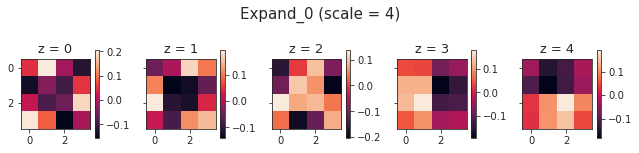

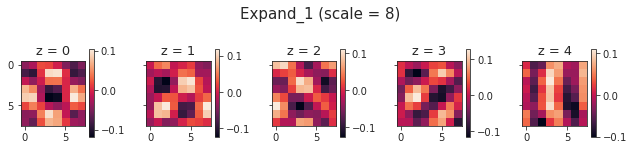

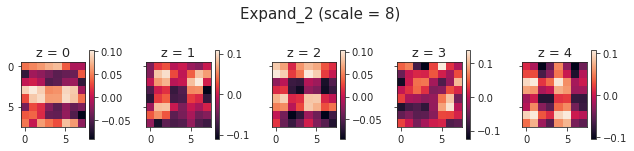

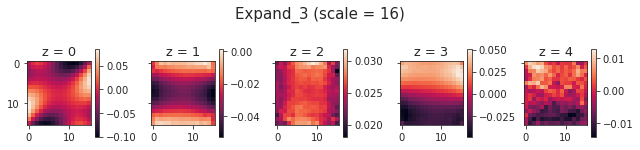

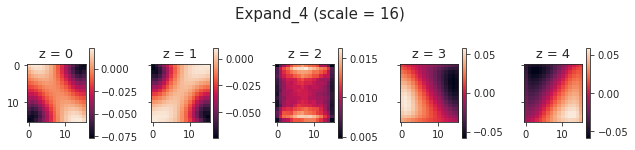

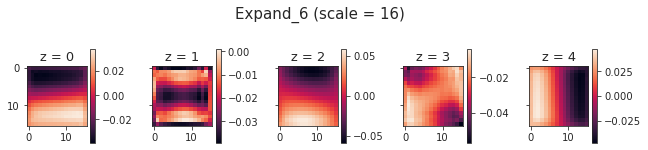

In [38]:
for i, _w in w2p.items():
    num = tr.model.cfg.n_latent_per_group
    fig, axes = create_figure(1, num, (9, 2.0), 'all', 'all', tight_layout=True)
    for z in range(num):
        ax = axes.flat[z]
        im = ax.imshow(_w[z, 0])
        plt.colorbar(im, ax=ax)
        ax.set_title(f'z = {z}', fontsize=13)
    fig.suptitle(f'Expand_{i} (scale = {scales[i]})', fontsize=15, y=1.02)
    plt.show()

In [32]:
ticks = [
    i for i in range(tr.model.cfg.total_latents())
    if i % tr.model.cfg.n_latent_per_group == 0
]
ticklabels = [i + 1 for i in ticks]

In [33]:
val['z'].shape

(7500, 35)

In [34]:
u, s, v = sp_lin.svd(val['z'], full_matrices=False, compute_uv=True)
s *= 100 / s.sum()
u.shape, s.shape, v.shape

((7500, 35), (35,), (35, 35))

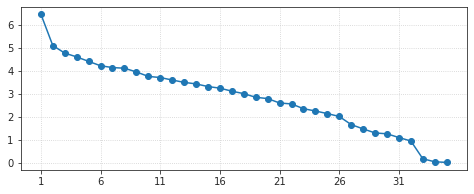

In [35]:
fig, ax = create_figure(figsize=(8, 3))
ax.plot(s, marker='o')
ax.set(xticks=ticks, xticklabels=ticklabels)
ax.grid()

In [36]:
fig, ax = create_figure()
ax.plot(v[0], marker='.')
ax.axhline(0, color='r', ls='--')
ax.set(xticks=ticks, xticklabels=ticklabels)
ax.grid()
plt.show()

In [39]:
r = 1 - sp_dist.pdist(val['z'].T, 'correlation')
r = sp_dist.squareform(r)

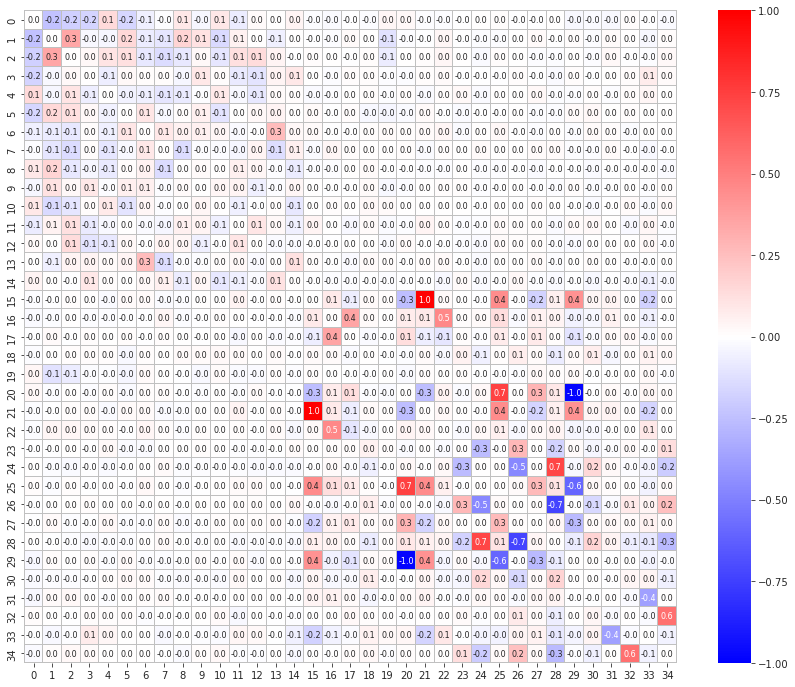

In [40]:
show_heatmap(r);

In [66]:
u_g, s_g, v_g = sp_lin.svd(g, full_matrices=False, compute_uv=True)
s_g *= 100 / s_g.sum()
u_g.shape, s_g.shape, v_g.shape

((7500, 11), (11,), (11, 11))

In [67]:
fig, ax = create_figure(figsize=(8, 3))
ax.plot(s, marker='o', label='latents')
ax.plot(s_g, marker='o', label='ground truth')
ax.set(xticks=ticks, xticklabels=ticklabels)
ax.legend()
ax.grid()

In [68]:
fig, ax = create_figure(figsize=(8, 3))
ax.plot(s, marker='o', label='latents')
ax.plot(s_g, marker='o', label='ground truth')
ax.set(xticks=ticks, xticklabels=ticklabels, yscale='log')
ax.legend()
ax.grid()

In [69]:
u_x, s_x, v_x = sp_lin.svd(
    flatten_arr(val['x'], ndim_start=1, ndim_end=0),
    full_matrices=False,
    compute_uv=True,
)
s_x *= 100 / s_x.sum()
u_x.shape, s_x.shape, v_x.shape

((7500, 722), (722,), (722, 722))

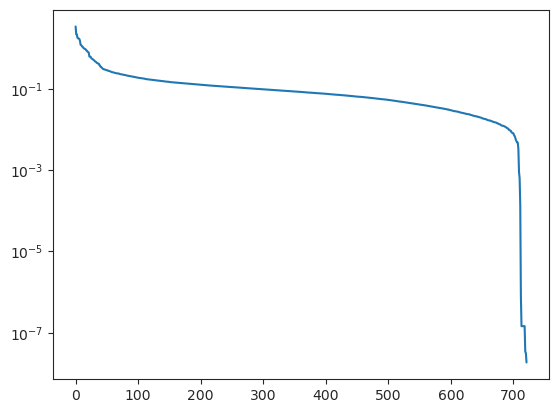

In [70]:
fig, ax = create_figure()
ax.plot(s_x)
ax.set_yscale('log')

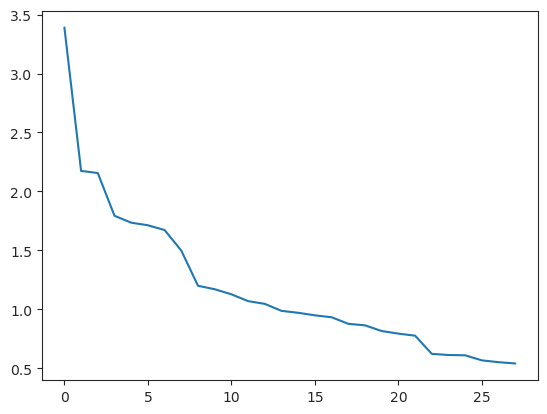

In [71]:
plt.plot(s_x[:28])

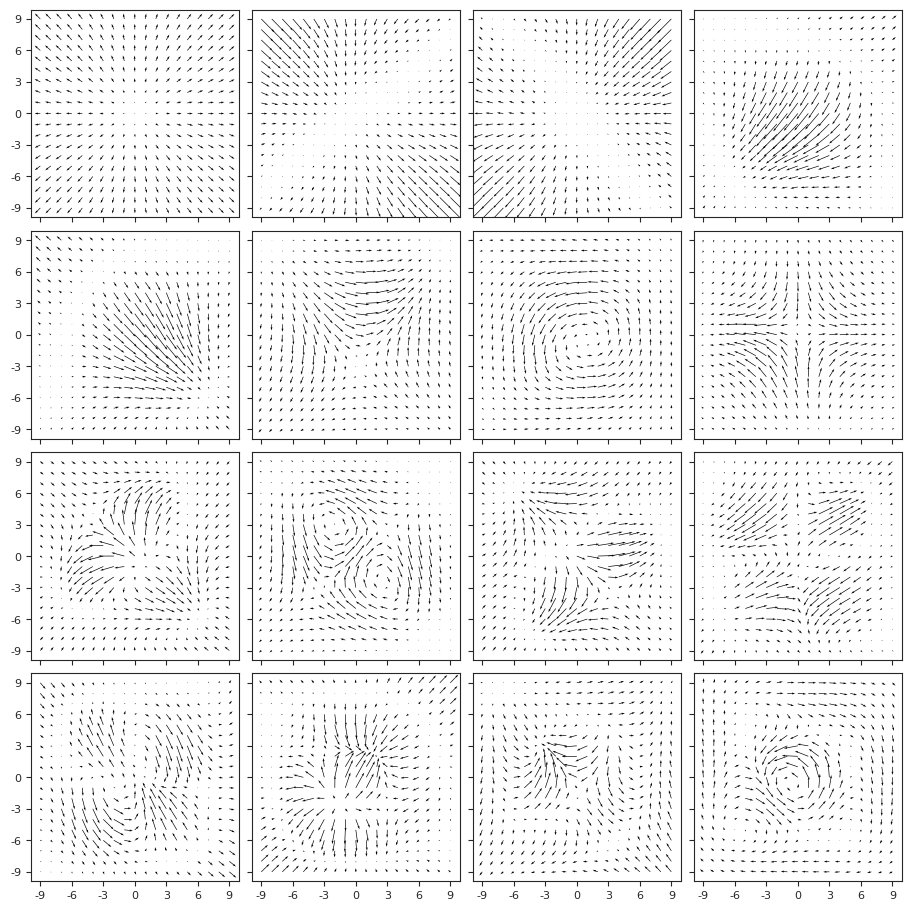

In [74]:
a = v_x[:64].reshape((64, 2, 19, 19))
show_opticflow(a, 4);

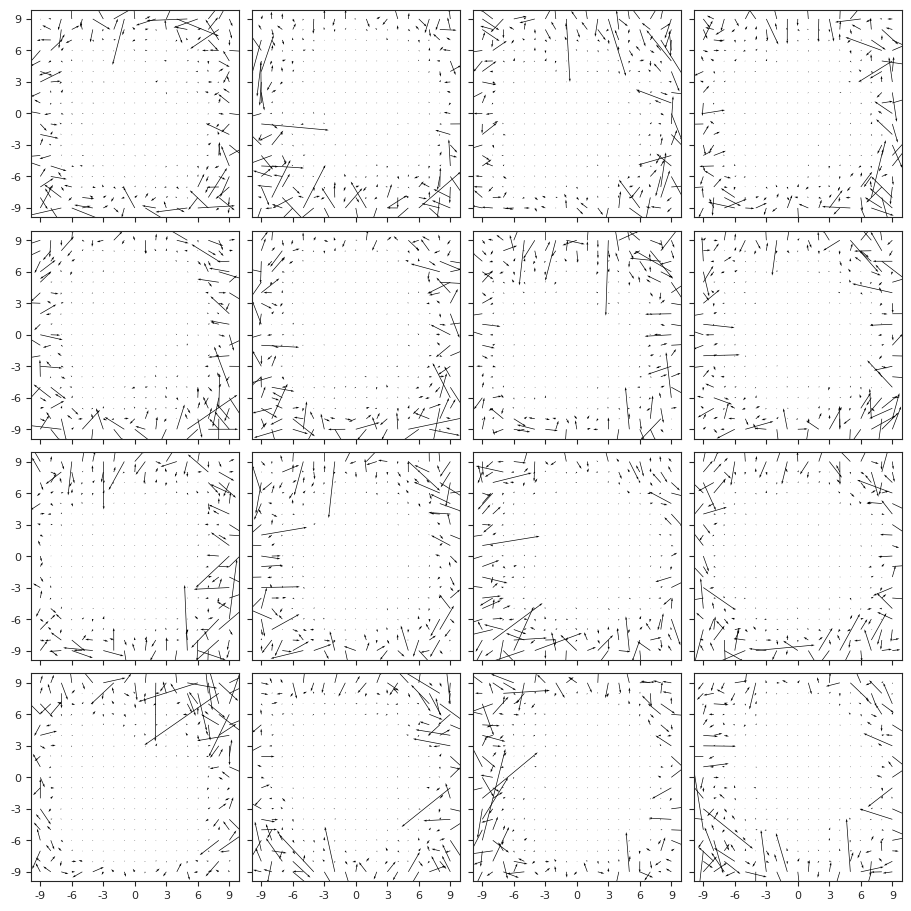

In [75]:
a = v_x[-64:].reshape((64, 2, 19, 19))
show_opticflow(a, 4);

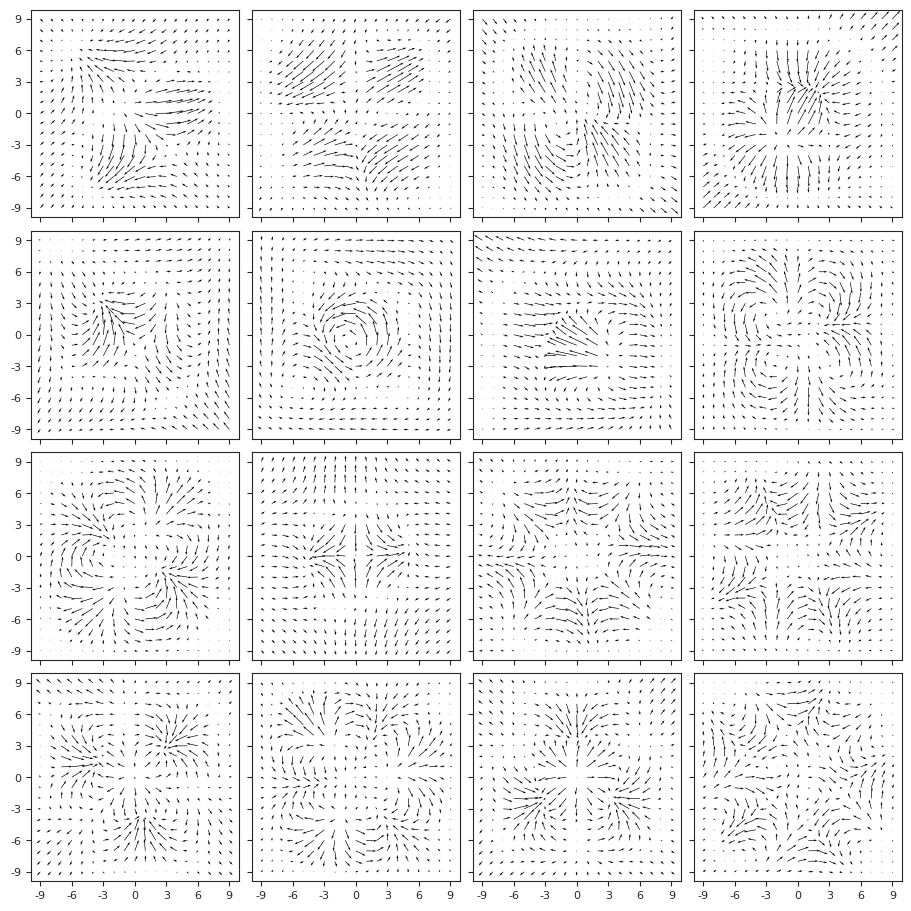

In [84]:
i = 10
a = v_x[i:i+16].reshape((16, 2, 19, 19))
show_opticflow(a, 4);

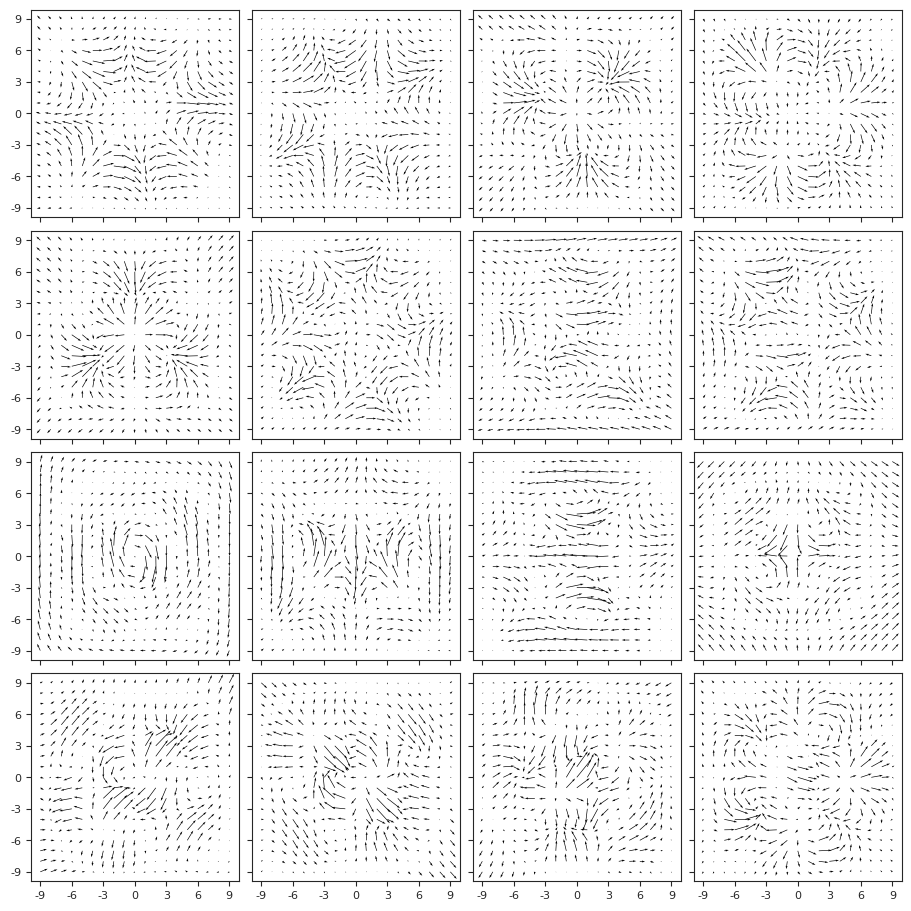

In [85]:
i = 20
a = v_x[i:i+16].reshape((16, 2, 19, 19))
show_opticflow(a, 4);

In [131]:
fig, ax = create_figure(1, 1, (11, 6))
ax.semilogx(s_x, marker='.')
ax.axvline(2.5, ls='--', color='k', lw=0.7, label='2.5')
ax.axvline(7.5, ls='--', color='g', lw=0.7, label='7.5')
ax.axvline(21.5, ls='--', color='r', lw=0.7, label='21.5')
ax.legend()
ax.grid()

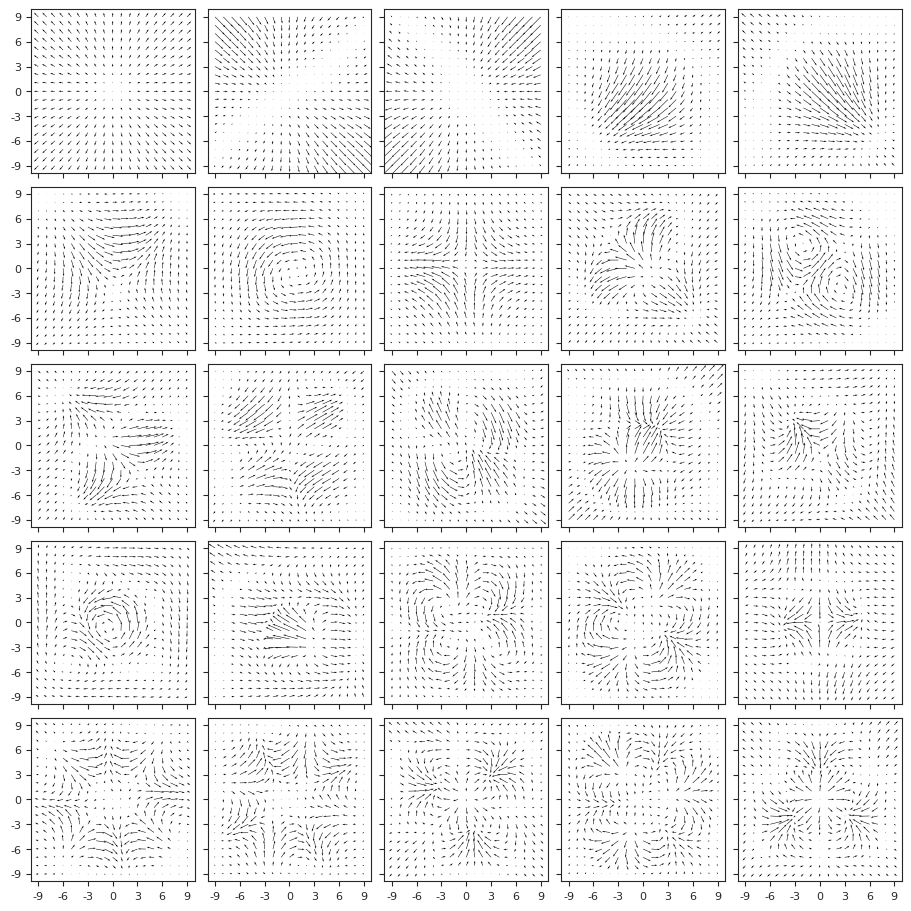

In [132]:
i = 0
a = v_x[i:i+25].reshape((25, 2, 19, 19))
show_opticflow(a, 5);

In [135]:
a = v_x[6].reshape((2, 19, 19))
show_opticflow_full(a);

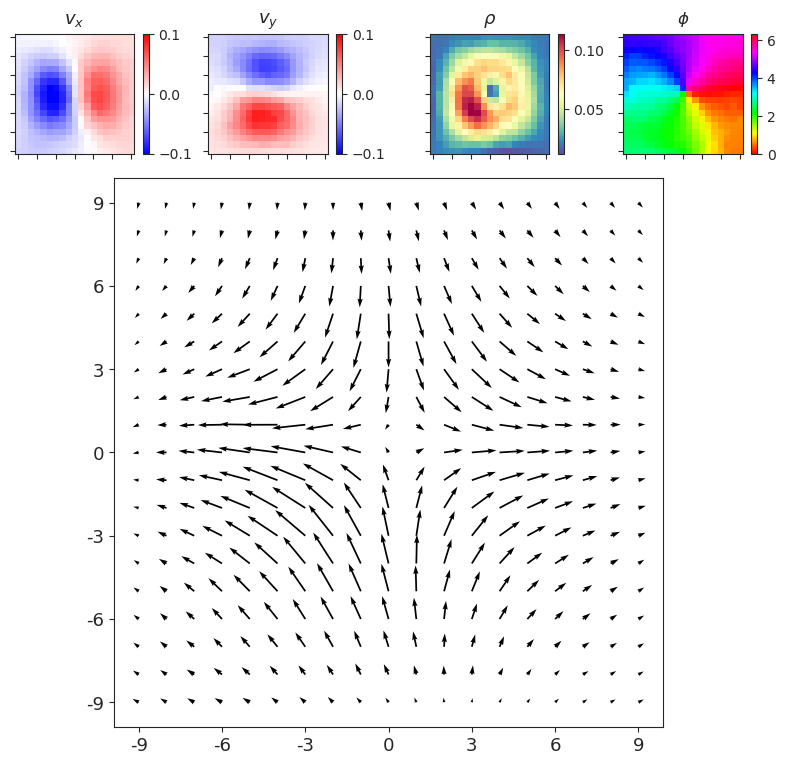

In [136]:
a = v_x[7].reshape((2, 19, 19))
show_opticflow_full(a);

In [137]:
fig, ax = create_figure(figsize=(8, 3))
ax.plot(s, marker='o', label='latents')
ax.plot(s_g, marker='o', label='ground truth')
ax.plot(s_x[:28], marker='o', label='raw spatial')
ax.set(xticks=ticks, xticklabels=ticklabels)
ax.legend()
ax.grid()

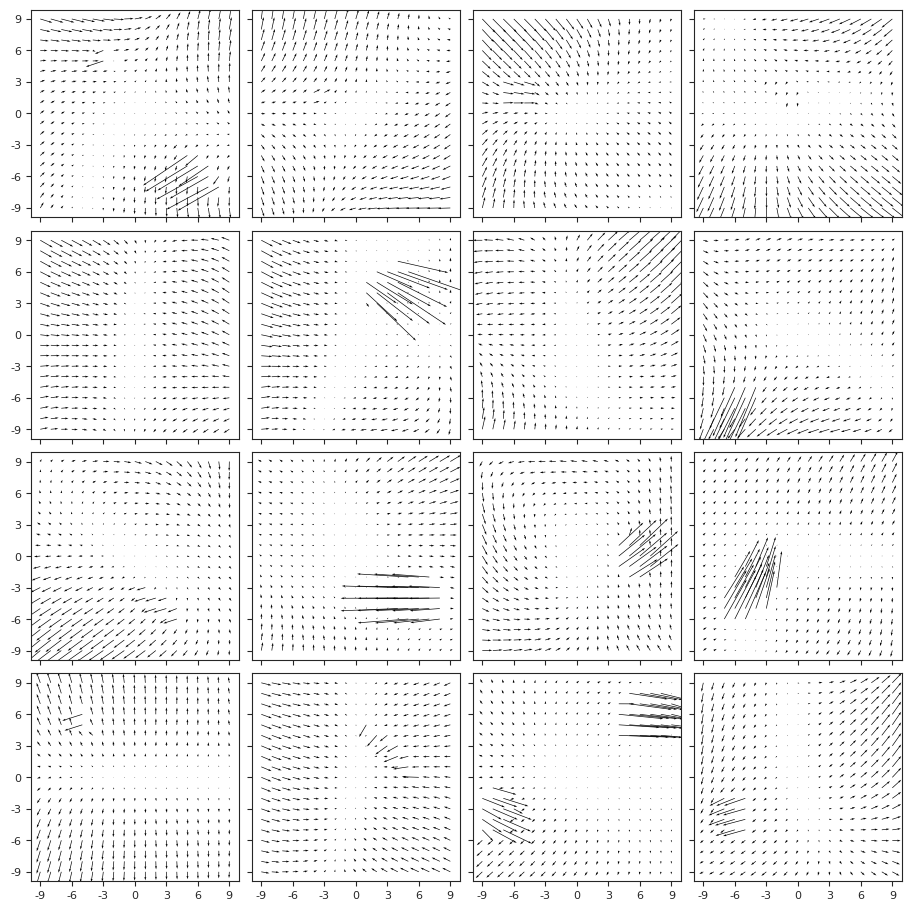

In [138]:
show_opticflow(val['x_sample'][2000:3000], 4);

In [121]:
rho, theta = vel2polar(val['x'], axis=1)
rho.shape, theta.shape

((7500, 19, 19), (7500, 19, 19))

<AxesSubplot:ylabel='Count'>

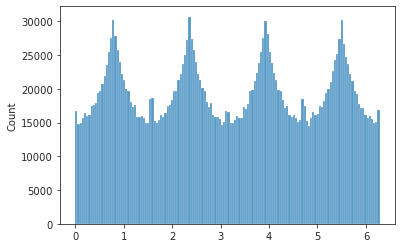

In [122]:
sns.histplot(theta.ravel())

In [123]:
sns.histplot(rho.ravel())

<AxesSubplot:ylabel='Count'>

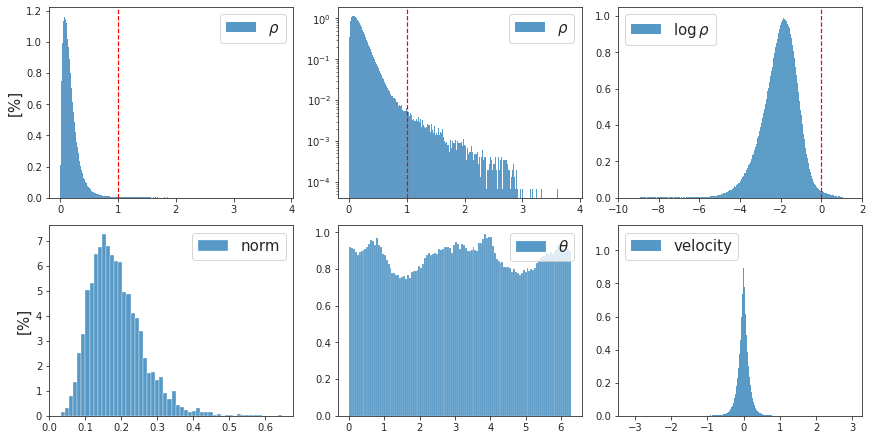

(<Figure size 864x432 with 6 Axes>,
 array([[<AxesSubplot:ylabel='[%]'>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='[%]'>, <AxesSubplot:>, <AxesSubplot:>]],
       dtype=object))

In [169]:
plot_opticflow_hist(val['x_sample'])

In [13]:
tr

51 4056

102 8034

153 12012

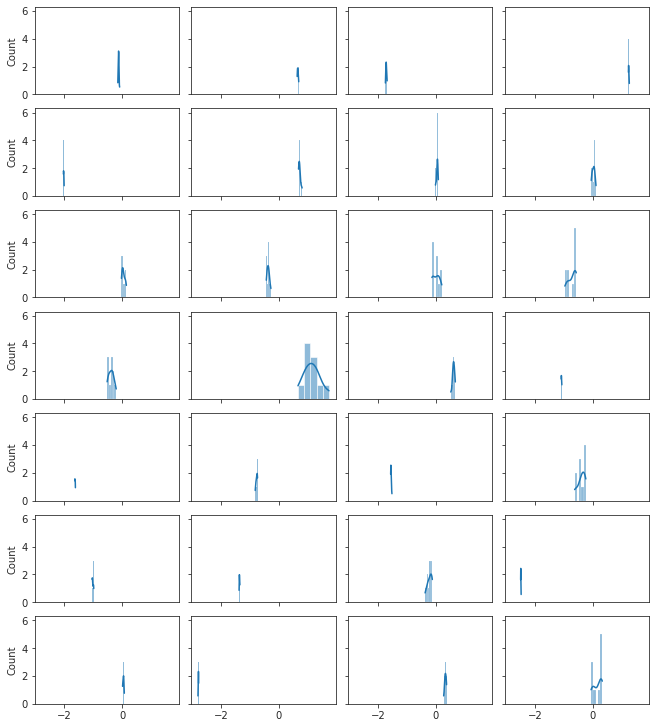

In [42]:
fig, axes = create_figure(7, 4, (9, 10), 'all', 'all', constrained_layout=True)
for i, ax in enumerate(axes.flat):
    sns.histplot(z_vld[:, 500, i], kde=True, ax=ax)

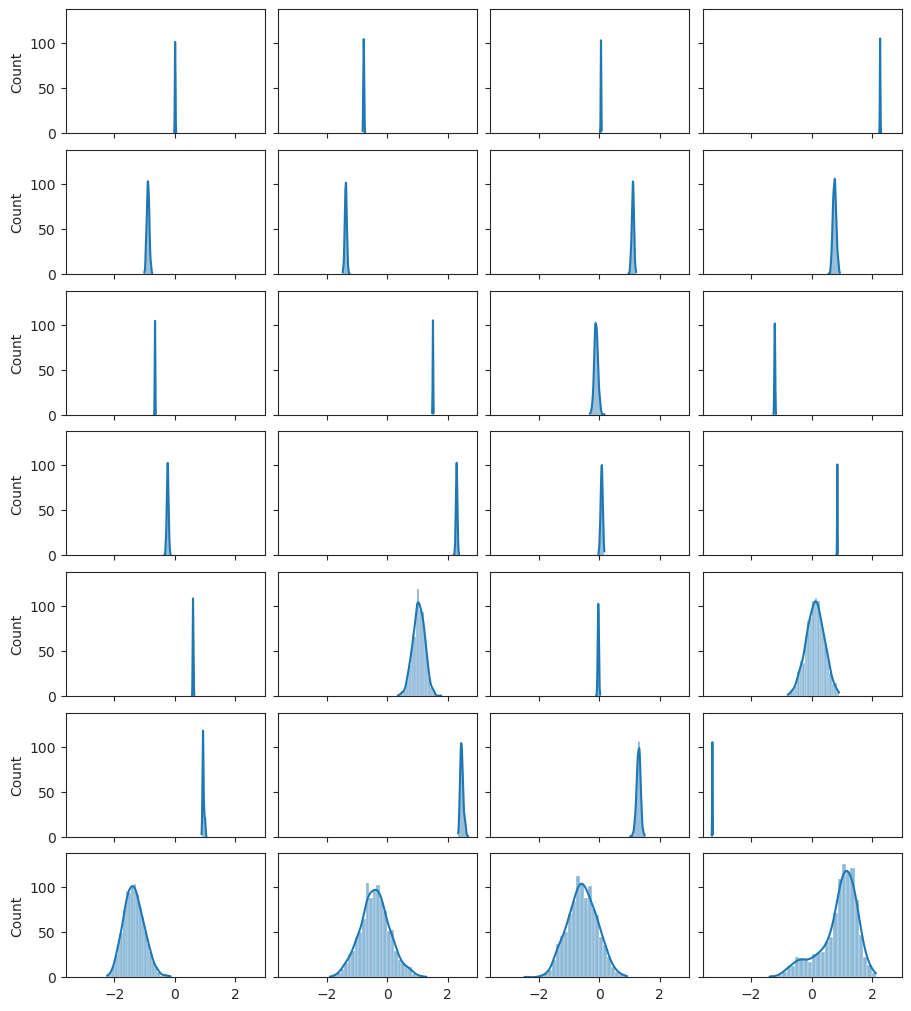

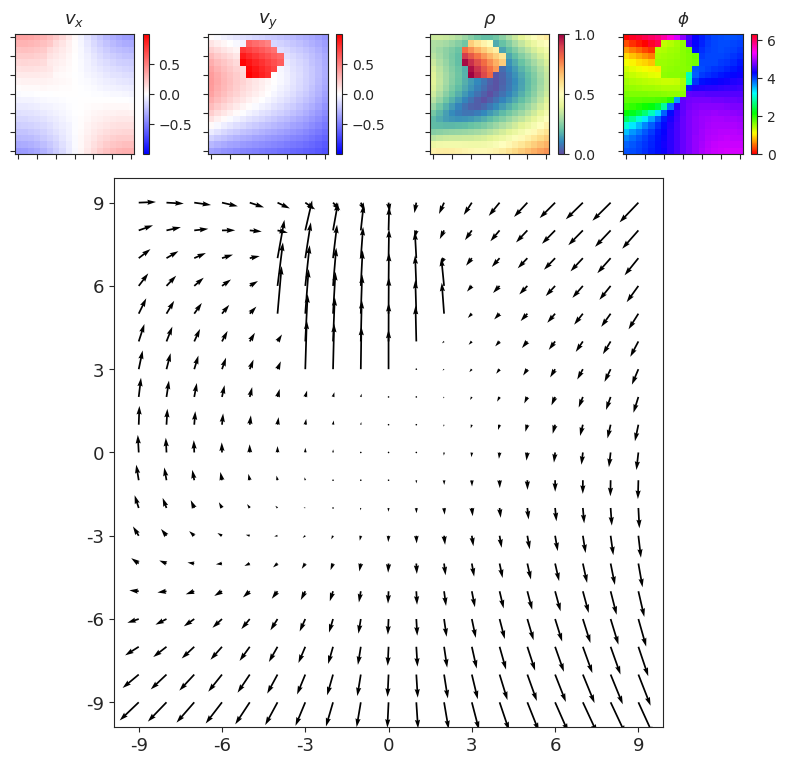

In [8]:
show_opticflow_full(val['x'][500]);

In [ ]:
vld, _ = tr.forward('vld')
tst, _ = tr.forward('tst')

In [21]:
r = 1 - sp_dist.pdist(z_vld.mean(0).T, 'correlation')
r = sp_dist.squareform(r)

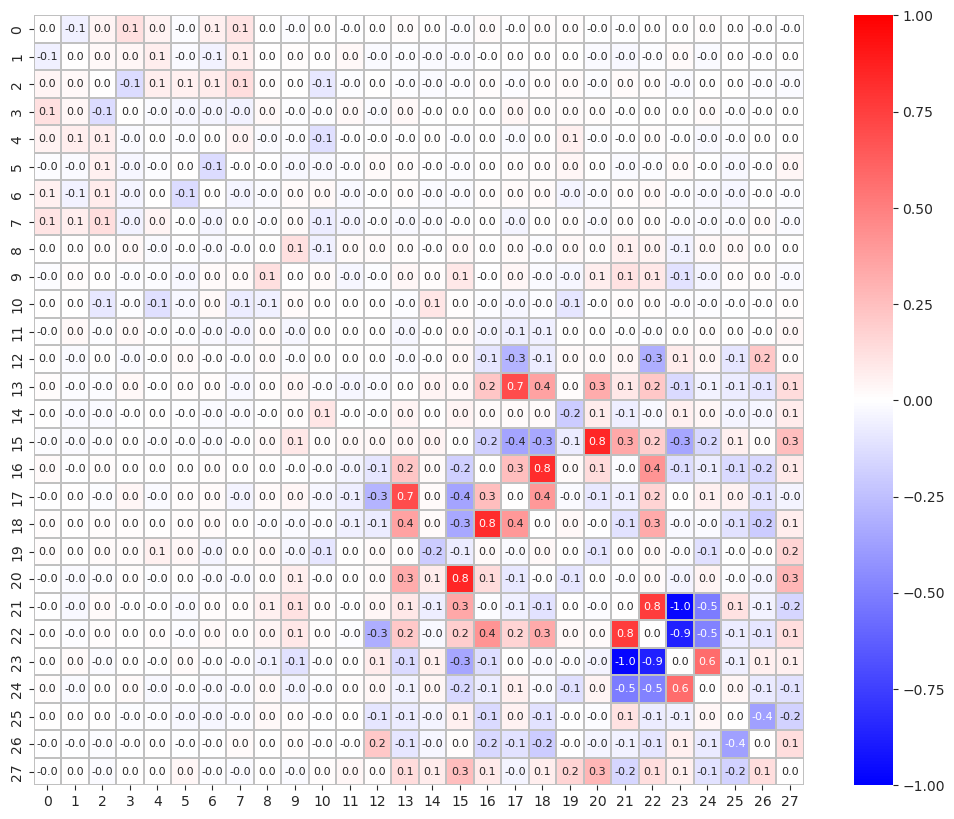

In [22]:
fig, ax = create_figure(1, 1, (13, 10))
sns.heatmap(
    r,
    vmin=-1,
    vmax=1,
    cmap='bwr',
    linewidths=0.005,
    linecolor='silver',
    square=True,
    annot=True,
    fmt='.1f',
    annot_kws={'fontsize': 8},
    ax=ax,
);

In [60]:
# create datasets
f = pjoin(tr.model.cfg.data_dir, tr.model.cfg.h_pre)
f = h5py.File(f, mode='r')
fix_vld = np.array(f['vld']['fix'], dtype=float)
pos_obj_vld = np.array(f['vld']['pos_obj'], dtype=float)
vel_obj_vld = np.array(f['vld']['vel_obj'], dtype=float)
vel_slf_vld = np.array(f['vld']['vel_slf'], dtype=float)
f.close()

pos_vld = dc(pos_obj_vld)
pos_vld[0] -= fix_vld[:, 0]
pos_vld[1] -= fix_vld[:, 1]
g_vld = np_nans((len(fix_vld), 11))
g_vld[:, :2] = fix_vld
g_vld[:, 2:5] = vel_slf_vld.T
g_vld[:, 5:8] = vel_obj_vld.T
g_vld[:, 8:11] = pos_vld.T
g_vld.shape

(7500, 11)

In [61]:
# create datasets
f = pjoin(tr.model.cfg.data_dir, tr.model.cfg.h_pre)
f = h5py.File(f, mode='r')
fix_tst = np.array(f['tst']['fix'], dtype=float)
pos_obj_tst = np.array(f['tst']['pos_obj'], dtype=float)
vel_obj_tst = np.array(f['tst']['vel_obj'], dtype=float)
vel_slf_tst = np.array(f['tst']['vel_slf'], dtype=float)
f.close()

pos_tst = dc(pos_obj_tst)
pos_tst[0] -= fix_tst[:, 0]
pos_tst[1] -= fix_tst[:, 1]
g_tst = np_nans((len(fix_tst), 11))
g_tst[:, :2] = fix_tst
g_tst[:, 2:5] = vel_slf_tst.T
g_tst[:, 5:8] = vel_obj_tst.T
g_tst[:, 8:11] = pos_tst.T
g_tst.shape

(2500, 11)

In [94]:
list(f['trn'])

['fix', 'pos_obj', 'vel_obj', 'vel_slf', 'x']

In [77]:
dim_names = {
    0: 'fix_x',
    1: 'fix_y',
    
    2: 'v_self_x',
    3: 'v_self_y',
    4: 'v_self_z',
    
    5: 'v_obj_x',
    6: 'v_obj_y',
    7: 'v_obj_z',
    
    8: 'pos_obj_x',
    9: 'pos_obj_y',
    10: 'pos_obj_z',
}

In [78]:
_tx = [f"({i:02d})" for i in range(len(corr))]
_ty = [f"{e} ({i:02d})" for i, e in dim_names.items()]

In [87]:
f=h5py.File(tr.model.cfg.h_pre)

In [88]:
list(f)

['trn', 'tst', 'vld']

In [90]:
g = f['trn']

In [92]:
type(g)

h5py._hl.group.Group

h5py._hl.group.Group

In [79]:
corr = 1 - sp_dist.pdist(g_vld.T, metric='correlation')
corr = sp_dist.squareform(corr)
corr.shape

(11, 11)

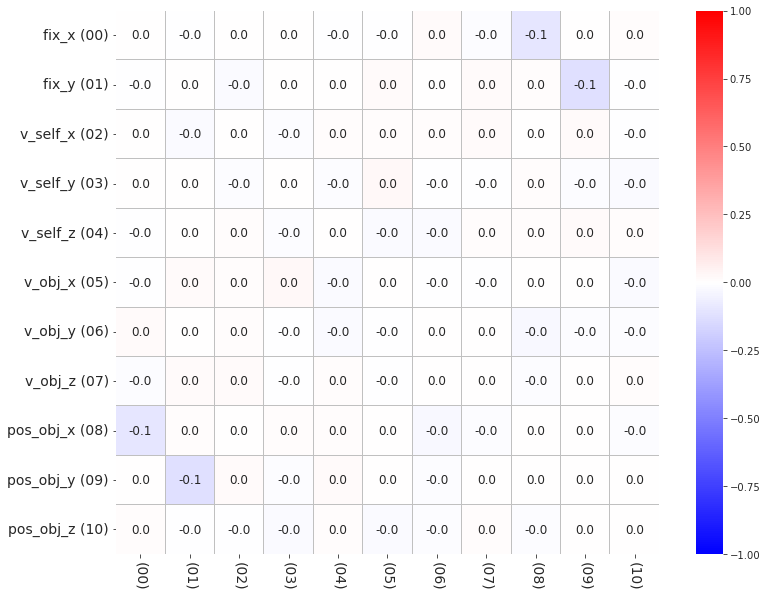

In [84]:
show_heatmap(corr, xticklabels=_tx, yticklabels=_ty, annot=True, 
             annot_kws={'fontsize': 12}, figsize=(13, 10));

In [28]:
u_g, s_g, v_g = sp_lin.svd(g_vld, full_matrices=False, compute_uv=True)
s_g *= 100 / s_g.sum()
u_g.shape, s_g.shape, v_g.shape

((7500, 11), (11,), (11, 11))

In [29]:
u, s, v = sp_lin.svd(z_vld.mean(0), full_matrices=False, compute_uv=True)
s *= 100 / s.sum()
u.shape, s.shape, v.shape

((7500, 28), (28,), (28, 28))

In [31]:
ticks = [
    i for i in range(tr.model.cfg.total_latents())
    if i % tr.model.cfg.n_latent_per_group == 0
]
ticklabels = [i + 1 for i in ticks]

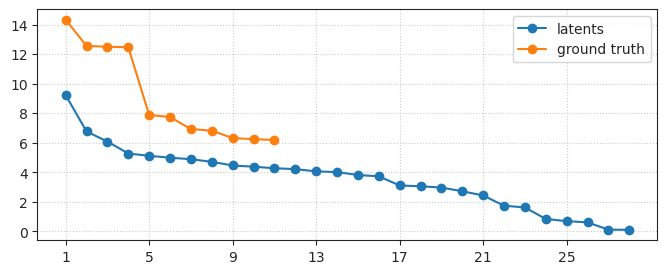

In [32]:
fig, ax = create_figure(figsize=(8, 3))
ax.plot(s, marker='o', label='latents')
ax.plot(s_g, marker='o', label='ground truth')
ax.set(xticks=ticks, xticklabels=ticklabels)
ax.legend()
ax.grid()

In [99]:
from sklearn import linear_model

In [100]:
lr = linear_model.LinearRegression().fit(z_vld.mean(0), g_vld)
pred = lr.predict(z_tst.mean(0))
r = 1 - sp_dist.cdist(pred.T, g_tst.T, metric='correlation')
pred.shape, r.shape

((2500, 11), (11, 11))

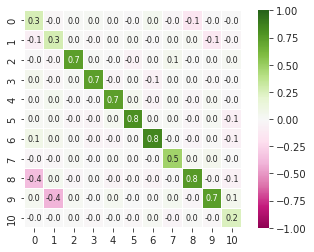

In [58]:
fig, ax = create_figure()
sns.heatmap(
    r,
    cmap='PiYG',
    vmin=-1, 
    vmax=1,
    square=True,
    linewidth=0.01,
    annot=True,
    fmt='.1f',
    annot_kws={'fontsize': 8},
    ax=ax
)
plt.show()

{0: 'fix_x',
 1: 'fix_y',
 2: 'v_self_x',
 3: 'v_self_y',
 4: 'v_self_z',
 5: 'v_obj_x',
 6: 'v_obj_y',
 7: 'v_obj_z',
 8: 'pos_obj_x',
 9: 'pos_obj_y',
 10: 'pos_obj_z'}

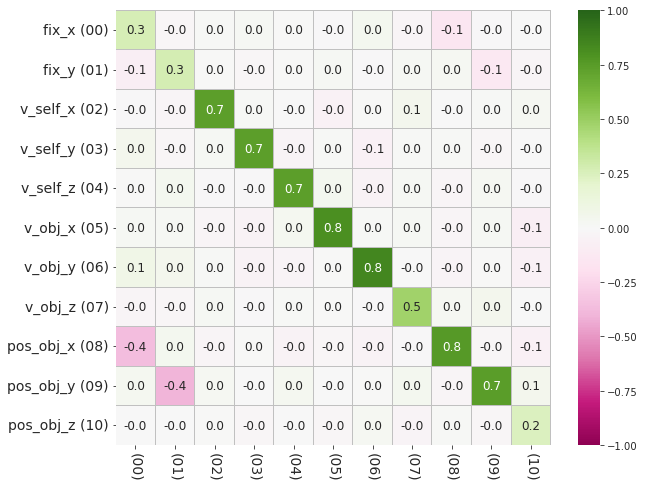

In [71]:
_tx = [f"({i:02d})" for i in range(len(tr.dl_tst.dataset.factor_names))]
_ty = [f"{e} ({i:02d})" for i, e in tr.dl_tst.dataset.factor_names.items()]
show_heatmap(r, xticklabels=_tx, yticklabels=_ty, cmap='PiYG', annot_kws={'fontsize': 12}, figsize=(10, 8));

In [76]:
def show_heatmap(
		r: np.ndarray,
		xticklabels: List[str] = None,
		yticklabels: List[str] = None,
		display: bool = True,
		**kwargs, ):
	defaults = dict(
		figsize=(15, 12),
		tick_labelsize_x=14,
		tick_labelsize_y=14,
		vmin=-1,
		vmax=1,
		cmap='bwr',
		linewidths=0.005,
		linecolor='silver',
		square=True,
		annot=True,
		fmt='.1f',
		annot_kws={'fontsize': 8},
	)
	kwargs = setup_kwargs(defaults, kwargs)
	kwargs['center'] = (kwargs['vmax'] + kwargs['vmin']) / 2
	fig, ax = create_figure(figsize=kwargs['figsize'])
	sns.heatmap(r, ax=ax, **filter_kwargs(sns.heatmap, kwargs))
	if xticklabels is not None:
		ax.set_xticklabels(xticklabels)
		ax.tick_params(
			axis='x',
			rotation=-90,
			labelsize=kwargs['tick_labelsize_x'],
		)
	if yticklabels is not None:
		ax.set_yticklabels(yticklabels)
		ax.tick_params(
			axis='y',
			rotation=0,
			labelsize=kwargs['tick_labelsize_y'],
		)
	if display:
		plt.show()
	else:
		plt.close()
	return fig, ax


In [ ]:
fig, ax = create_figure(figsize=(12, 3.5))
sns.heatmap(mi, vmin=0, linewidth=0.01, linecolor='dimgrey')
ax.set_yticklabels([f"{e} ({i:02d})" for i, e in dim_names.items()])
ax.tick_params(axis='y', rotation=0)
plt.show()

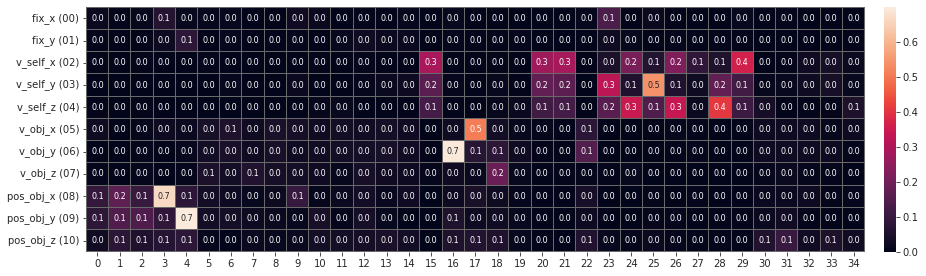

In [103]:
show_heatmap(
    mi, yticklabels=_ty, tick_labelsize_y=10,
    vmin=0, vmax=None, cmap='rocket', linecolor='dimgrey',
    cbar_kws={'pad': 0.02},
    figsize=(17, 4.5));

In [ ]:
sns.heatmap()

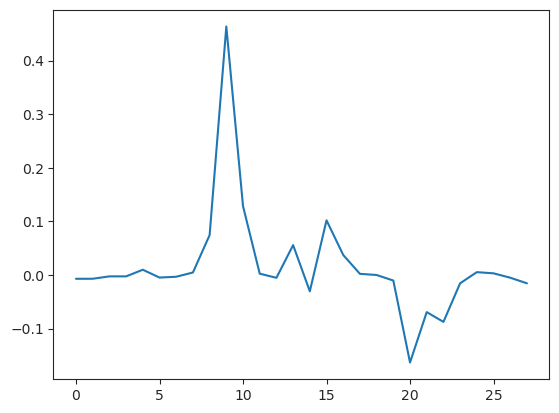

In [90]:
plt.plot(lr.coef_[6])

In [92]:
ridge = linear_model.Ridge(alpha=1.0).fit(z_vld.mean(0), g_vld)
pred = lr.predict(z_tst.mean(0))
r = 1 - sp_dist.cdist(pred.T, g_tst.T, metric='correlation')
pred.shape

(2500, 11)

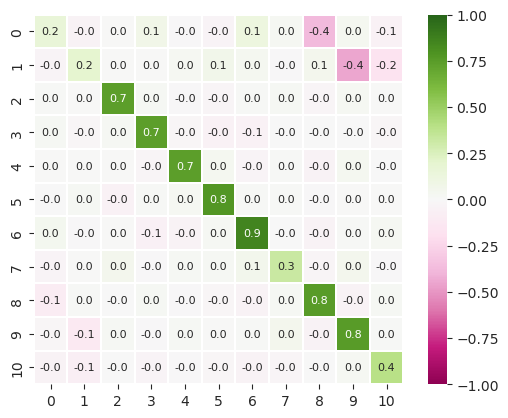

In [93]:
fig, ax = create_figure()
sns.heatmap(
    r,
    cmap='PiYG',
    vmin=-1, 
    vmax=1,
    square=True,
    linewidth=0.01,
    annot=True,
    fmt='.1f',
    annot_kws={'fontsize': 8},
    ax=ax
)
plt.show()

In [94]:
from sklearn import linear_model

In [95]:
lr = linear_model.LinearRegression().fit(g_vld, z_vld.mean(0))
pred = lr.predict(g_tst)
r = 1 - sp_dist.cdist(pred.T, z_tst.mean(0).T, metric='correlation')
pred.shape, r.shape

((2500, 28), (28, 28))

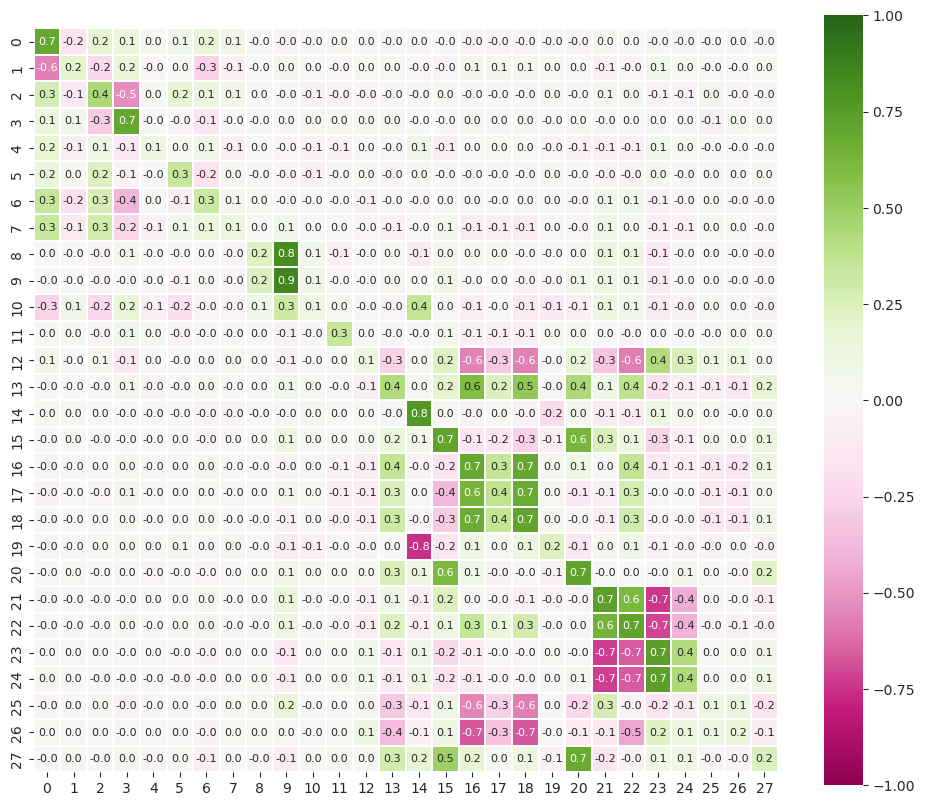

In [98]:
fig, ax = create_figure(figsize=(12, 10))
sns.heatmap(
    r,
    cmap='PiYG',
    vmin=-1, 
    vmax=1,
    square=True,
    linewidth=0.01,
    annot=True,
    fmt='.1f',
    annot_kws={'fontsize': 8},
    ax=ax
)
plt.show()

In [102]:
from sklearn.feature_selection import mutual_info_regression

In [174]:
mi = np.zeros((11, 28))
for i in range(11):
    mi[i] = mutual_info_regression(z_vld.mean(0), g_vld[:, i])

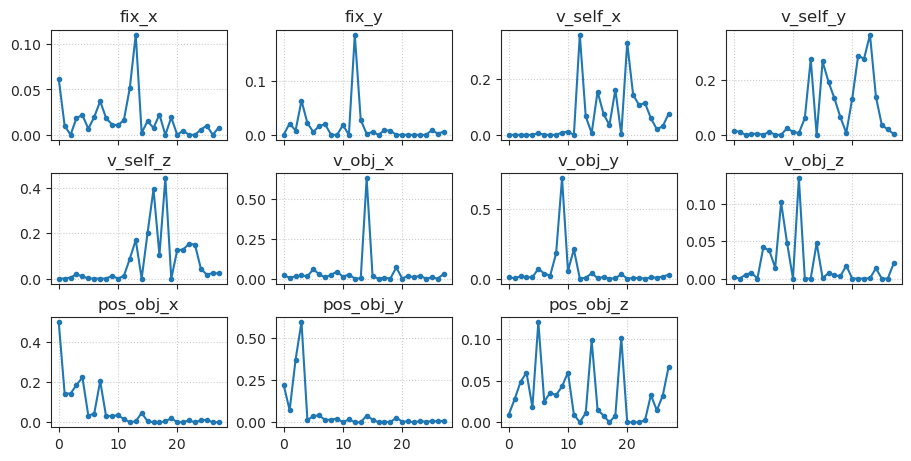

In [175]:
fig, axes = create_figure(3, 4, (9, 4.5), 'all', 'none', constrained_layout=True)
for i in range(11):
    ax = axes.flat[i]
    ax.plot(mi[i], marker='.')
    ax.set_title(dim_names[i])
    ax.grid()
trim_axs(axes, 11)
plt.show()

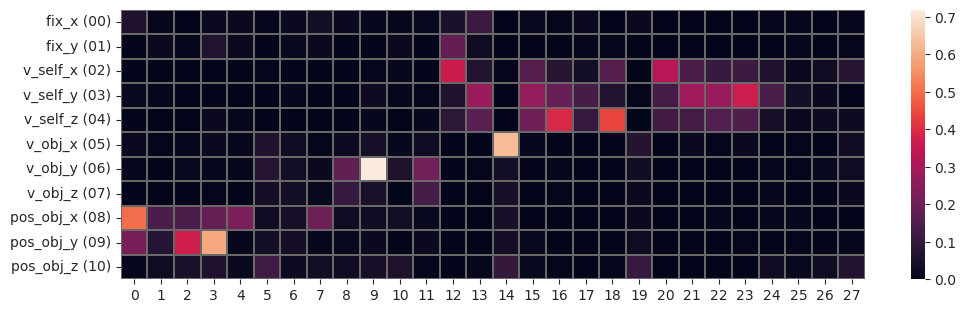

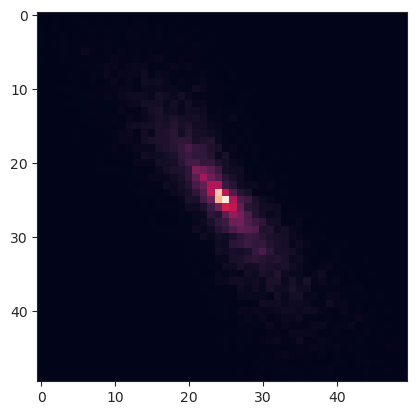

In [233]:
i, j = 6, 9
c_xy = np.histogram2d(g_vld[:, i], z_vld.mean(0)[:, j], 50)[0]
plt.imshow(c_xy);

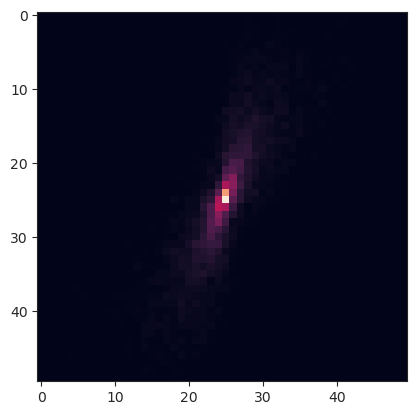

In [234]:
i, j = 5, 14
c_xy = np.histogram2d(g_vld[:, i], z_vld.mean(0)[:, j], 50)[0]
plt.imshow(c_xy);

In [241]:
fix = g_vld[:, :2]
fix = np.concatenate([
    fix,
    np.ones((len(fix), 1)),
], axis=1)
fix.shape

(7500, 3)

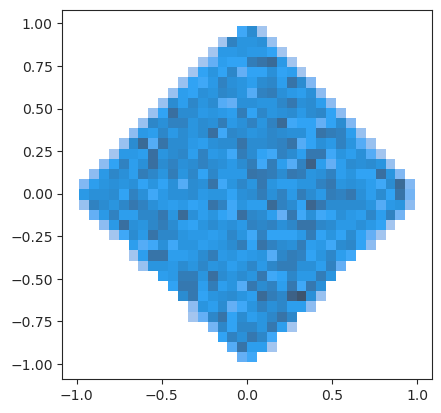

In [242]:
ax = sns.histplot(x=fix[:, 0], y=fix[:, 1])
ax_square(ax);

<AxesSubplot:ylabel='Count'>

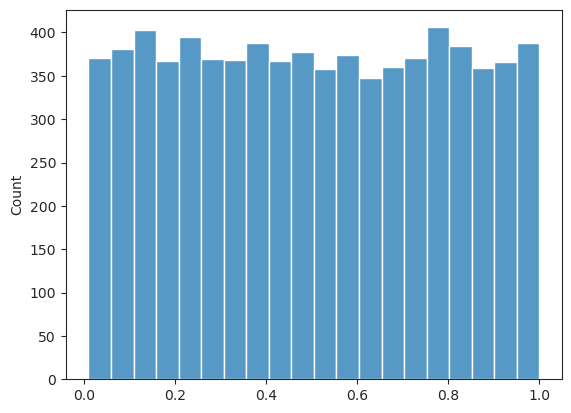

In [247]:
heading = g_vld[:, 2:5]
sns.histplot(cart2polar(heading)[:, 0])

In [249]:
heading.shape

(7500, 3)

In [250]:
fix.shape

(7500, 3)

In [258]:
cos = 1 - sp_dist.cdist(fix, heading, metric='cosine')
theta = np.arccos(np.diag(cos))
theta.shape

(7500,)

In [265]:
mi_emerg = mutual_info_regression(z_vld.mean(0), theta)
mi_emerg.shape

(28,)

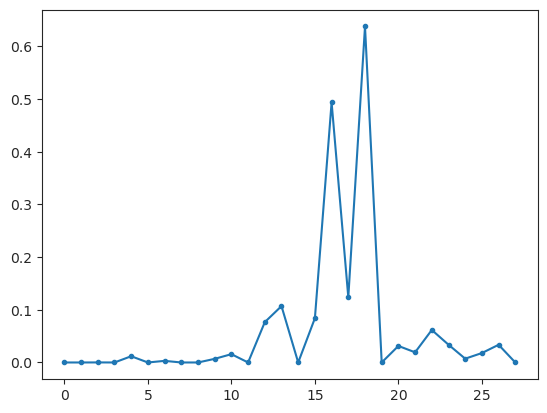

In [266]:
plt.plot(mi_emerg, marker='.')

In [287]:
sp_stats.pearsonr(z_vld.mean(0)[:, 18], theta)

(-0.807030982337451, 0.0)

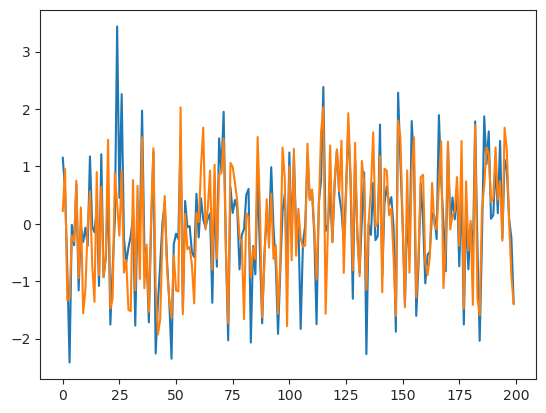

In [290]:
intvl = range(200)
plt.plot(sp_stats.zscore(z_vld.mean(0)[:, 18][intvl]))
plt.plot(-sp_stats.zscore(theta[intvl]))

In [301]:
sp_stats.pearsonr(z_vld.mean(0)[:, 18], heading[:, 2])

(0.6923865139636309, 0.0)

In [302]:
sp_stats.pearsonr(theta, heading[:, 2])

(-0.7550395076607881, 0.0)